# Importing useful libraries


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

## Data exploration and preprocessing 


In [2]:
# loading our dataset
df = pd.read_csv(r"C:\Users\NAVEE\mental-heath-in-tech-2016_20161114.csv")
print(df)

      Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                                NaN           
1430        

In [3]:
# visual of our dataset
df.describe(include='object')

How many employees does your company or organization have?  \
count                                                1146           
unique                                                  6           
top                                                26-100           
freq                                                  292           

       Does your employer provide mental health benefits as part of healthcare coverage?  \
count                                                1146                                  
unique                                                  4                                  
top                                                   Yes                                  
freq                                                  531                                  

       Do you know the options for mental health care available under your employer-provided coverage?  \
count                                                1013                                                
unique                                                  3                                                
top                                                    No                                                
freq                                                  354                                                

       Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
count                                                1146                                                                                       
unique                                                  3                                                                                       
top                                                    No                                                                                       
freq                                                  813                                                                                       

       Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
count                                                1146                                                            
unique                                                  3                                                            
top                                                    No                                                            
freq                                                  531                                                            

       Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  \
count                                                1146                                                                                               
unique                                                  3                                                                                               
top                                          I don't know                                                                                               
freq                                                  742                                                                                               

       If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
count                                                1146                                                            
unique                                                  6                                                            
top                                         Somewhat easy                                                            
freq                                                  281                                                         

In [4]:
# listing all the colums present in the dataset
list(df.columns)

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

In [5]:
# renaming the cloumns 
# here the "mh" stands for mental health  

df.columns = ['self_employed', 'no_of_employee', 'tech_employeer','Tech/IT role','mh_benefit','mhcare_by_employer','mh_discussion_by_employer','ml_resources',
           'anonimity_protection_by_employer','mh_leave','mh_discussion_neg_consiquences','pysical_discussion_neg_consiquences',
            'mh_discussion_with_coworker','mh_discussion_with_supervisor','seriousness_of_mh_by_employer',
             'neg_consequence_of_mh_in_workspace','medical_coverage_include_mh'
            ,'resources_for_mh_disorder','diagnosed_with_mh_revel_to_clients','reveling_mh_to_client_neg_impact',
             'diagnosed_with_mh_and_revel_to_coworker',
            'reveling_mh_to_coworker_neg_impact','affect_on_productivity_by_mh','%_Of_time_impacted_by_mh',
             'previous_employer','mh_benefits_by_previous_employer'
            ,'aware_about_the_mh_benfits_by_previous_employer','discussion_about_mh_by_previous_empoyer',
             'resources_by_previosu_employer_for_mh',
            'anonimity_protection_by_previous_empolyer_on_mh','neg_impact_of_mh_discussion_with_old_employer',
             'neg_impact_of_pysical_health_discussion_with_old_employer',
            'wiling_to_discuss_mh_with_old_coworker','wiling_to_discuss_mh_with_supervisor','previous_employer_take_mh_seriously',
             'observe_neg_consequence_mh_in_old_workspace',
            'wiling_to_talk_about_physical_health_in_interview','why_why_not','wiling_to_talk_about_mh_in_interview',
             'why_why_not','impact_of_mh_on_carrer',
            'negativly_viewd_by_coworker_on_mh_issue','wiling_to_share_with_friend_about_mh',
             'unsupportive_response_in_current_workspace_about_mh','observation_about_another_coworker_mh_in_workspace'
            ,'family_history_of_mh_illness','mh_disorder_in_past','currently_mh_disorder',
             'what_condition_diagnosed_with','condition_you_believe_you_have',
             'diagnosed_with_mh_issue_by_professional','what_condition_you_diagnosed',
             'sought_treatment_for_mh_by_professional','mh_issue_with_work',
             'mh_issue_with_work_if_not_treated','age','gender','country_live','us_state_territory','country_you_work_in',
             'us_stare_territory_you_work','position','work_remotely']
        

In [6]:
print(df.head())

   self_employed no_of_employee  tech_employeer  Tech/IT role  \
0              0         26-100             1.0           NaN   
1              0           6-25             1.0           NaN   
2              0           6-25             1.0           NaN   
3              1            NaN             NaN           NaN   
4              0           6-25             0.0           1.0   

                        mh_benefit mhcare_by_employer  \
0  Not eligible for coverage / N/A                NaN   
1                               No                Yes   
2                               No                NaN   
3                              NaN                NaN   
4                              Yes                Yes   

  mh_discussion_by_employer ml_resources anonimity_protection_by_employer  \
0                        No           No                     I don't know   
1                       Yes          Yes                              Yes   
2                        No        

In [7]:
# checking how many null values are present in different columns
print(df.isnull().sum())

self_employed                     0
no_of_employee                  287
tech_employeer                  287
Tech/IT role                   1170
mh_benefit                      287
                               ... 
us_state_territory              593
country_you_work_in               0
us_stare_territory_you_work     582
position                          0
work_remotely                     0
Length: 63, dtype: int64


In [8]:
# checking the null value and non null values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   self_employed                                              1433 non-null   int64  
 1   no_of_employee                                             1146 non-null   object 
 2   tech_employeer                                             1146 non-null   float64
 3   Tech/IT role                                               263 non-null    float64
 4   mh_benefit                                                 1146 non-null   object 
 5   mhcare_by_employer                                         1013 non-null   object 
 6   mh_discussion_by_employer                                  1146 non-null   object 
 7   ml_resources                                               1146 non-null   object 
 8   anonimit

In [9]:
# cleaning of dataset
# drop columns with more than 30% missing value

percentage_missing=df.isnull().sum()*100/len(df)

col_to_drop=percentage_missing[percentage_missing>30].keys()
col_to_drop

Index(['Tech/IT role', 'medical_coverage_include_mh',
       'resources_for_mh_disorder', 'diagnosed_with_mh_revel_to_clients',
       'reveling_mh_to_client_neg_impact',
       'diagnosed_with_mh_and_revel_to_coworker',
       'reveling_mh_to_coworker_neg_impact', 'affect_on_productivity_by_mh',
       '%_Of_time_impacted_by_mh',
       'observation_about_another_coworker_mh_in_workspace',
       'what_condition_diagnosed_with', 'condition_you_believe_you_have',
       'what_condition_you_diagnosed', 'us_state_territory',
       'us_stare_territory_you_work'],
      dtype='object')

In [10]:
# droping the columns
df.drop(col_to_drop, axis=1, inplace=True)

In [11]:
# visulaizing the column once again to see the currnet structure of our dataset.
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 48 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   self_employed                                              1433 non-null   int64  
 1   no_of_employee                                             1146 non-null   object 
 2   tech_employeer                                             1146 non-null   float64
 3   mh_benefit                                                 1146 non-null   object 
 4   mhcare_by_employer                                         1013 non-null   object 
 5   mh_discussion_by_employer                                  1146 non-null   object 
 6   ml_resources                                               1146 non-null   object 
 7   anonimity_protection_by_employer                           1146 non-null   object 
 8   mh_leave

In [12]:
# descrining our dataset in detail
df.describe()

self_employed  tech_employeer  previous_employer  \
count    1433.000000     1146.000000        1433.000000   
mean        0.200279        0.770506           0.882066   
std         0.400349        0.420691           0.322643   
min         0.000000        0.000000           0.000000   
25%         0.000000        1.000000           1.000000   
50%         0.000000        1.000000           1.000000   
75%         0.000000        1.000000           1.000000   
max         1.000000        1.000000           1.000000   

       sought_treatment_for_mh_by_professional          age  
count                              1433.000000  1433.000000  
mean                                  0.585485    34.286113  
std                                   0.492810    11.290931  
min                                   0.000000     3.000000  
25%                                   0.000000    28.000000  
50%                                   1.000000    33.000000  
75%                                   1.000000    39.000000  
max                                   1.000000   323.000000

In [13]:
# checking the shape of our dataset
df.shape

(1433, 48)

In [14]:
df.head()

self_employed no_of_employee  tech_employeer  \
0              0         26-100             1.0   
1              0           6-25             1.0   
2              0           6-25             1.0   
3              1            NaN             NaN   
4              0           6-25             0.0   

                        mh_benefit mhcare_by_employer  \
0  Not eligible for coverage / N/A                NaN   
1                               No                Yes   
2                               No                NaN   
3                              NaN                NaN   
4                              Yes                Yes   

  mh_discussion_by_employer ml_resources anonimity_protection_by_employer  \
0                        No           No                     I don't know   
1                       Yes          Yes                              Yes   
2                        No           No                     I don't know   
3                       NaN          NaN                              NaN   
4                        No           No                               No   

                     mh_leave mh_discussion_neg_consiquences  ...  \
0                   Very easy                             No  ...   
1               Somewhat easy                             No  ...   
2  Neither easy nor difficult                          Maybe  ...   
3                         NaN                            NaN  ...   
4  Neither easy nor difficult                            Yes  ...   

  diagnosed_with_mh_issue_by_professional  \
0                                     Yes   
1                                     Yes   
2                                      No   
3                                     Yes   
4                                     Yes   

  sought_treatment_for_mh_by_professional    mh_issue_with_work  \
0                                       0  Not applicable to me   
1                                       1                Rarely   
2                                       1  Not applicable to me   
3                                       1             Sometimes   
4                                       1             Sometimes   

  mh_issue_with_work_if_not_treated age  gender              country_live  \
0              Not applicable to me  39    Male            United Kingdom   
1                         Sometimes  29    male  United States of America   
2              Not applicable to me  38   Male             United Kingdom   
3                         Sometimes  43    male            United Kingdom   
4                         Sometimes  43  Female  United States of America   

        country_you_work_in  \
0            United Kingdom   
1  United States of America   
2            United Kingdom   
3            United Kingdom   
4  United States of America   

                                            position work_remotely  
0                                 Back-end Developer     Sometimes  
1             Back-end Developer|Front-end Developer         Never  
2                                 Back-end Developer        Always  
3                               Supervisor/Team Lead     Sometimes  
4  Executive Leadership|Supervisor/Team Lead|Dev ...     Sometimes  

[5 rows x 48 columns]

In [15]:
# checking for duplicated values
df.duplicated().sum()

0

In [16]:
# checking similarity between two column
df['country_live'].isin(df["country_you_work_in"]).value_counts()

True     1431
False       2
Name: country_live, dtype: int64

In [17]:
df['mh_issue_with_work_if_not_treated'].isin(df['mh_issue_with_work']).value_counts()

True    1433
Name: mh_issue_with_work_if_not_treated, dtype: int64

In [18]:
# droping the column "country_you_work_in" and "why_why_not" becuase of too much similarity with other columns.
column_to_drop = ["country_you_work_in", "why_why_not"]

df.drop(column_to_drop, axis=1, inplace=True)

In [19]:
# cleaning the gender category 
df["gender"] = df["gender"].str.lower()

male = ["male","m","malr","sex is male","male (cis)","mail" ,"cis male", "dude","m|", "male ",
        "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of "
        "answered yes please. seriously how much text can this take?",
        "cisdude", "cis man", "male.", "man", "nb masculine"]

female = ["f","woman", "female", "fm", " female","female-bodied; no feelings about gender", "female/woman",
         "female assigned at birth","female (props for making this a freeform field, though)","cisgender female", "cis-woman",
         "cis female ", "fem", "female ", "i identify as female."]

df["gender"] = df["gender"].replace(male, "male")
df["gender"] = df["gender"].replace(female, "female")

other = list(df["gender"].value_counts().index)[2:]
df["gender"] = df["gender"].replace(other, "other")


In [20]:
# cheking the gender column to make sure everything working fine
df.value_counts("gender")

gender
male      1057
female     338
other       35
dtype: int64

In [21]:
# cleaning the mental health leave column

df["mh_leave"] = df["mh_leave"].str.lower()

easy = ["somewhat easy", "very easy", ]
difficult = ["somewhat difficult","very difficult"]
other = ["i don't know","neither easy nor difficult"]

df["mh_leave"] = df["mh_leave"].replace(easy, "easy")
df["mh_leave"] = df["mh_leave"].replace(difficult, 'difficult')
df["mh_leave"] = df["mh_leave"].replace(other, "other")
df.value_counts("mh_leave")

mh_leave
easy         501
other        328
difficult    317
dtype: int64

In [22]:
# replace some values in the "no of employee" column
df["no_of_employee"]=df["no_of_employee"].replace(("1-5"),("1-100"))
df["no_of_employee"]=df["no_of_employee"].replace(("6-25"),("1-100"))
df["no_of_employee"]=df["no_of_employee"].replace(("26-100"),("1-100"))
df["no_of_employee"]=df["no_of_employee"].replace(("More than 1000"),("1000+"))
df.value_counts("no_of_employee")

no_of_employee
1-100       562
1000+       256
100-500     248
500-1000     80
dtype: int64

In [23]:
# replace some large answer to small in size.
df["wiling_to_discuss_mh_with_supervisor"] = df["wiling_to_discuss_mh_with_supervisor"].replace(("Some of my previous employers"),("with_some"))
df["wiling_to_discuss_mh_with_supervisor"] = df["wiling_to_discuss_mh_with_supervisor"].replace(("No, at none of my previous employers"),("No"))
df["wiling_to_discuss_mh_with_supervisor"] = df["wiling_to_discuss_mh_with_supervisor"].replace(("I don't know"),("don't know"))
df["wiling_to_discuss_mh_with_supervisor"] = df["wiling_to_discuss_mh_with_supervisor"].replace(("Yes, at all of my previous employers"),("Yes"))

In [24]:
# convert 1,0 to yes , no in some column
df["self_employed"] = df['self_employed'].replace((1,0),('Yes','No'))
df["tech_employeer"] = df["tech_employeer"].replace((1.0,0.0),('Yes','No'))
df["previous_employer"] = df["previous_employer"].replace((1, 0), ('Yes', 'No'))
df["sought_treatment_for_mh_by_professional"] = df["sought_treatment_for_mh_by_professional"].replace((1, 0), ('Yes', 'No'))

In [25]:
# some replacment in country live column
df["country_live"] = df["country_live"].replace(("United States of America"),("USA"))
df["country_live"] = df["country_live"].replace(("United Kingdom"),("UK"))
country = ["Denmark" ,"Bulgaria" ,"Finland" ,"Italy" ,"Belgium" ,"Spain","Austria" ,"South Africa" ,"Poland","Romania",
           "Pakistan", "Norway" ,"Czech Republic","Chile","Lithuania","Other","Mexico",
           "Afghanistan","Japan","Colombia" ,"Bosnia and Herzegovina","Estonia","Israel","Venezuela",
           "Argentina","Bangladesh" ,"Taiwan","Brunei","China","Serbia","Slovakia","Costa Rica",
           "Ecuador","Greece","Guatemala","Hungary","Algeria", "Iran","Vietnam" ]

df["country_live"] =df["country_live"].replace(country, "other")

df.value_counts("country_live")    


country_live
USA            840
UK             180
other           97
Canada          78
Germany         58
Netherlands     48
Australia       35
Sweden          19
France          16
Ireland         15
Brazil          10
Switzerland     10
India            9
New Zealand      9
Russia           9
dtype: int64

1301


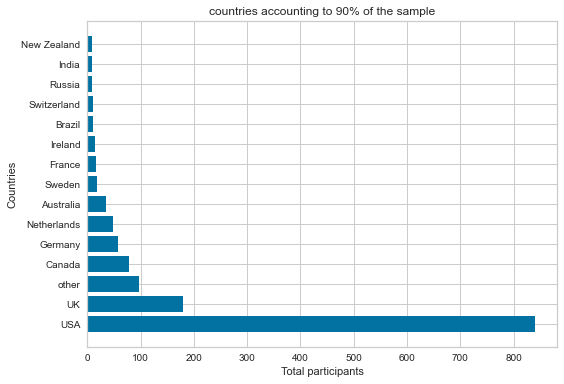

In [26]:
# visualizing the number of people from different countries

for x in df["country_live"].value_counts().cumsum():
    if x/1433 > 0.90:
        print(x)
        break
        
df["country_live"] = df["country_live"].replace()        
        
df_countries = df["country_live"].value_counts().cumsum()[:15].to_frame().reset_index()
df_countries_full = df.loc[df["country_live"].isin(df_countries["index"].to_list())]

df_countries_full_ordered =df_countries_full["country_live"].value_counts().to_frame().reset_index()
y_pos = np.arange(len(df_countries_full_ordered["index"]))


plt.barh(y_pos, df_countries_full_ordered["country_live"], alpha=1)
plt.yticks(y_pos, df_countries_full_ordered["index"])

plt.xlabel("Total participants")
plt.ylabel("Countries")
plt.title("countries accounting to 90% of the sample")
plt.tight_layout()
plt.show()

In [27]:
# calculating the mean age value
mean_age =df["age"].mean()
print(mean_age)
df['age'].fillna(mean_age, inplace=True)

34.28611304954641


In [28]:
# changing an incorrect age value of greater than 75 and less than 18 to mean value 
mean = round(mean_age)
for i in df["age"]:
    if i >= 75  or i <= 18:
        df['age'] = df['age'].replace([i], mean)    
        

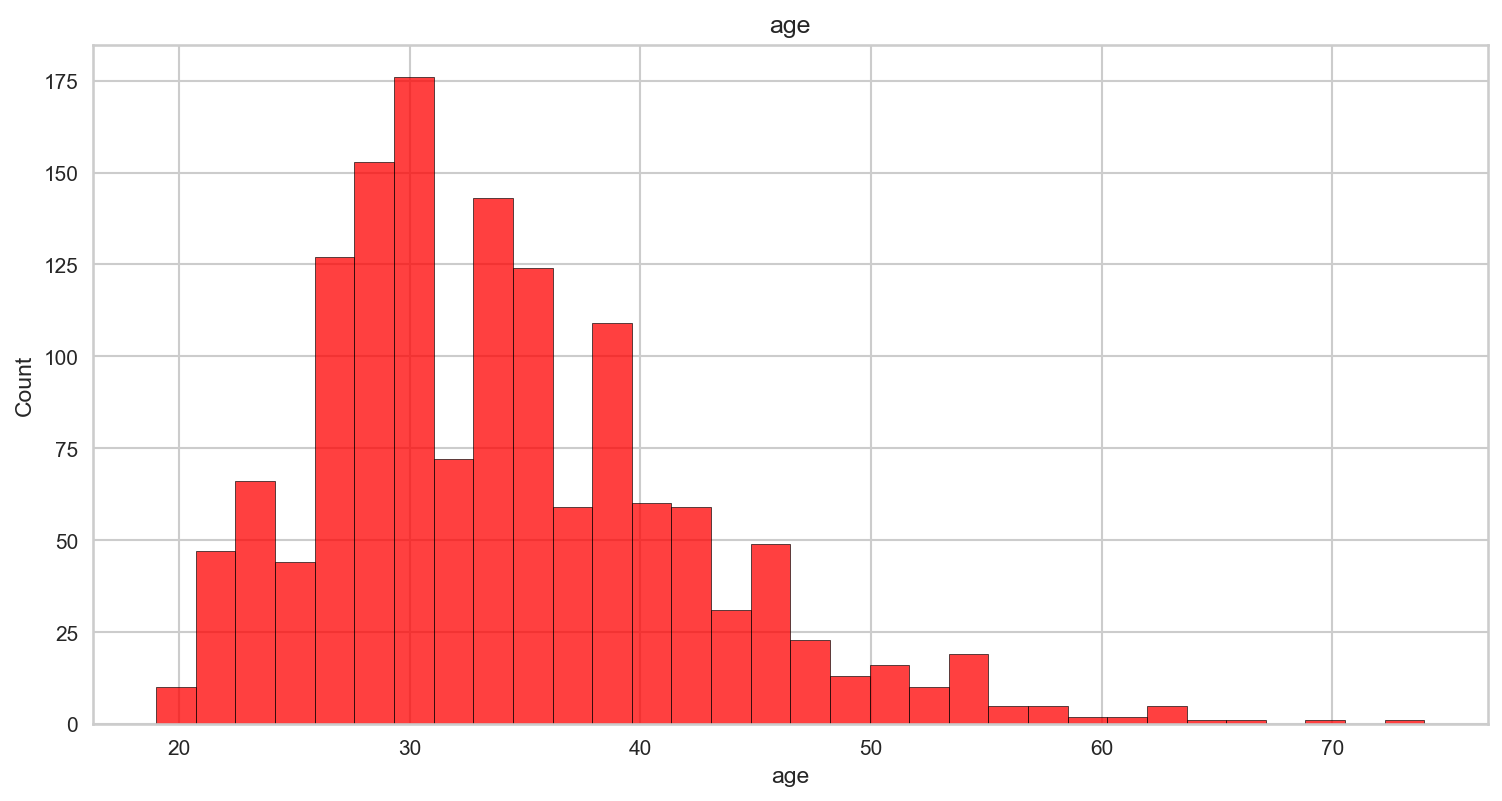

In [29]:
# a visual graph of our age column with updates values

plt.figure(figsize=(12,6),dpi=150)
sns.histplot(data=df,x="age",color="red")
plt.title("age")
plt.show()

In [30]:
# Do some more changes in the age column to decrease the number of different values in the column.
for i in df["age"]:
    if i >= 20 and i < 30:
        df["age"] = df["age"].replace([i],"18+")
    elif i >= 30 and i < 50:
        df["age"] = df["age"].replace([i],"30+")
    elif i >= 50 and i < 60:
        df["age"] = df["age"].replace([i],"50+")
    elif i > 60:
        df["age"] = df["age"].replace([i],"60+")                       

In [31]:
df["age"] = df["age"].replace(19,"18+")

In [32]:
# checking the new values
df.value_counts("age")

age
30+    918
18+    447
50+     57
60+     11
dtype: int64

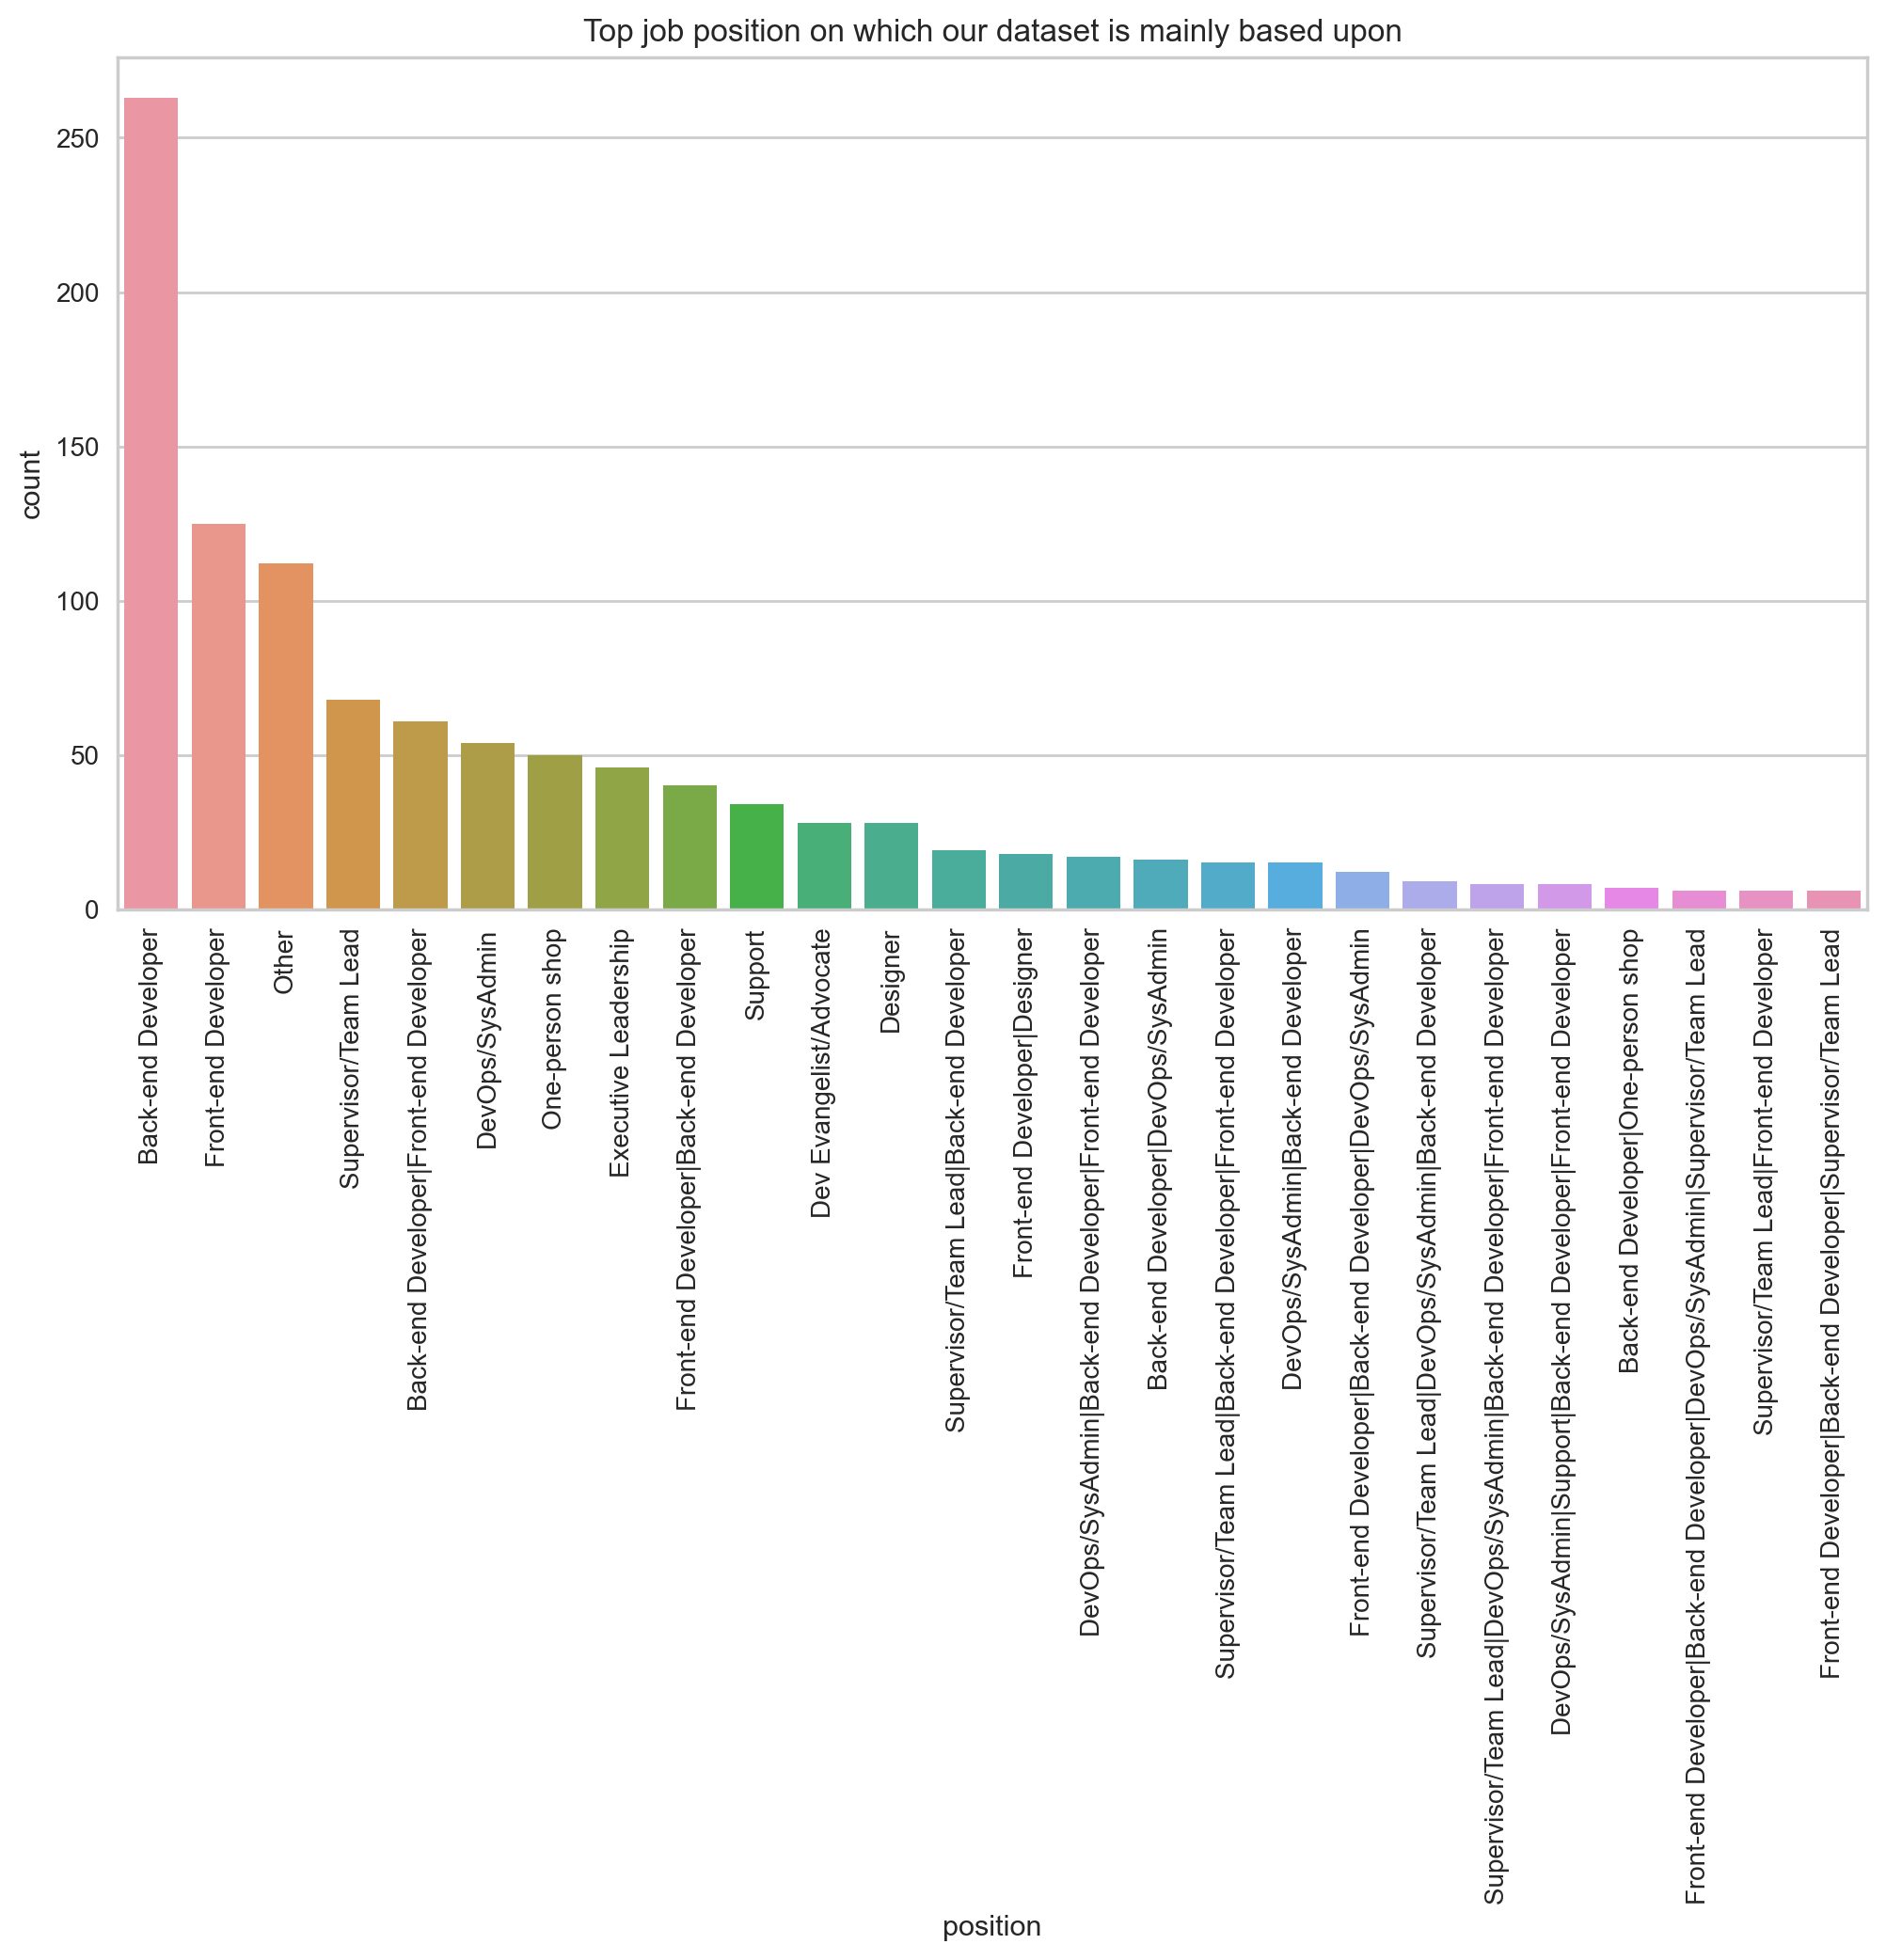

In [33]:
# visualizing the job position column on a bar graph

plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="position",order=df.position.value_counts().cumsum()[:26].index)
plt.title("Top job position on which our dataset is mainly based upon")
plt.xticks(rotation=90)
plt.show()

In [34]:
# the job position column is too diverse. so, convert the values to a shorter form.

job_roles = df["position"].unique()
category = {
    "IT": ["Back", "Developer", "Front"],
    "Management": ["Supervisor","Team", "Lead", "Leadership"],
    "DevOps": ["DevOps", "SysAdmin"],
    "Advocacy": ["Evangelist", "Advocate"],
    "Support": ["Support"],
    "Design": ["Design"], 
    "Sales": ["Sales"],
    "Other": ["Other"],
    "One-person":["One","person", "shop"],
    "HR": ['HR']
}


for role in job_roles:
    for word in role.lower().split():
        for key, values in category.items():
            if any(value.lower() in word for value in values):
                df['position'].replace(role, value=key, inplace=True)
                break
                
                               

In [35]:
# checking the changed values for the position column
df.value_counts("position")

position
IT            746
Management    268
Other         130
One-person    104
DevOps         75
Support        41
Advocacy       30
Design         29
HR              6
Sales           4
dtype: int64

In [36]:
df.value_counts("mhcare_by_employer")

mhcare_by_employer
No               354
I am not sure    352
Yes              307
dtype: int64

<AxesSubplot:>

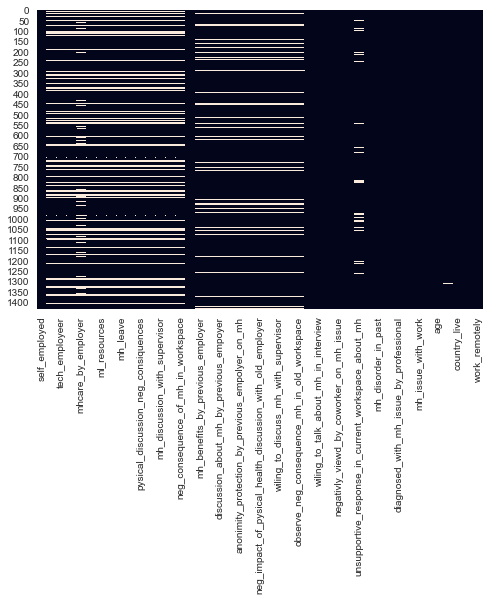

In [37]:
# representation of the null values present in our dataset.
sns.heatmap(df.isnull(),cbar=False)

In [38]:
df.isna().sum()

self_employed                                                  0
no_of_employee                                               287
tech_employeer                                               287
mh_benefit                                                   287
mhcare_by_employer                                           420
mh_discussion_by_employer                                    287
ml_resources                                                 287
anonimity_protection_by_employer                             287
mh_leave                                                     287
mh_discussion_neg_consiquences                               287
pysical_discussion_neg_consiquences                          287
mh_discussion_with_coworker                                  287
mh_discussion_with_supervisor                                287
seriousness_of_mh_by_employer                                287
neg_consequence_of_mh_in_workspace                           287
previous_employer        

In [39]:
# dealing with the null values and replacing them with the most frequent values.
df = df.replace("Not applicable to me",np.nan)

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(df)
imputed_data = mode_imputer.transform(df)
df = pd.DataFrame(data=imputed_data, columns=df.columns)



# Data visualization 

Text(0.5, 1.0, 'Do you have a mental health disorder in the past?')

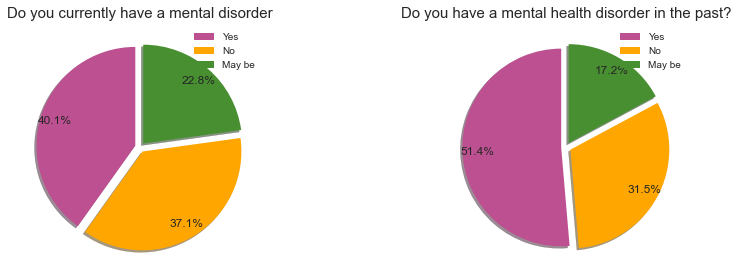

In [40]:
explode = (0.05, 0.05, 0.05)
colors = ["#bc5090","#ffa600","#488f31"]
plt.figure(figsize=(14, 10))
# first pie chart
labels = ['Yes', 'No', "May be"]
values = df['currently_mh_disorder'].value_counts()
sizes = [values[0], values[1], values[2]]

plt.subplot(2,2,1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True,explode=explode)
plt.legend(labels,loc="best")
plt.title("Do you currently have a mental disorder",fontsize=15)

# second pie chart
label = ["Yes","No","May be"]
values = df['mh_disorder_in_past'].value_counts()
sizes1 = [values[0], values[1], values[2]]

plt.subplot(2,2,2)
plt.pie(sizes1, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True,explode=explode)
plt.legend(label,loc="best")
plt.title("Do you have a mental health disorder in the past?", fontsize =15)

Text(0.5, 1.0, 'Mental health issue with work if not treated')

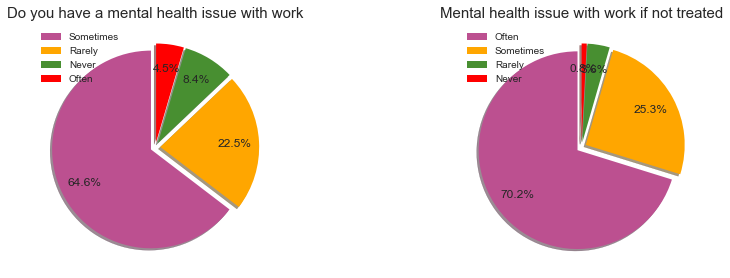

In [41]:
plt.figure(figsize=(14, 10))
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)

# First Pie: 
labels = ["Sometimes", 'Rarely', "Never","Often"]
value = df['mh_issue_with_work'].value_counts()
sizes = [value[0],value[1],value[2],value[3]]

plt.subplot(2, 2, 1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels, loc="best")
plt.title("Do you have a mental health issue with work",fontsize=15)

# Second Pie: 
labels_2 = ["Often","Sometimes","Rarely","Never"]
value = df["mh_issue_with_work_if_not_treated"].value_counts()
explode = (0.05, 0.05, 0.05,0.05)
sizes_2 = [value[0],value[1],value[2],value[3]]

plt.subplot(2, 2, 2)
plt.pie(sizes_2, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels_2, loc="best")
plt.title("Mental health issue with work if not treated",fontsize=15)

Text(0.5, 1.0, 'Anonimity protection by previous employer on mh')

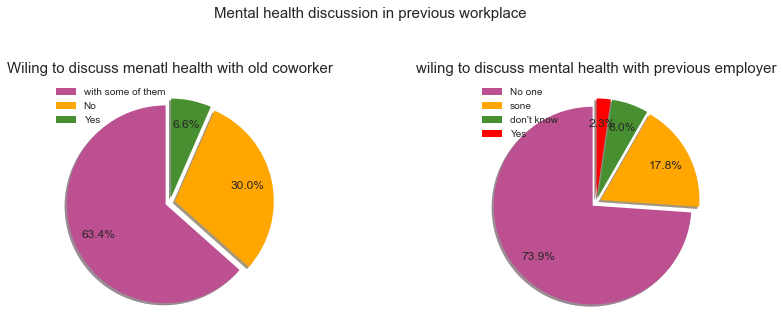

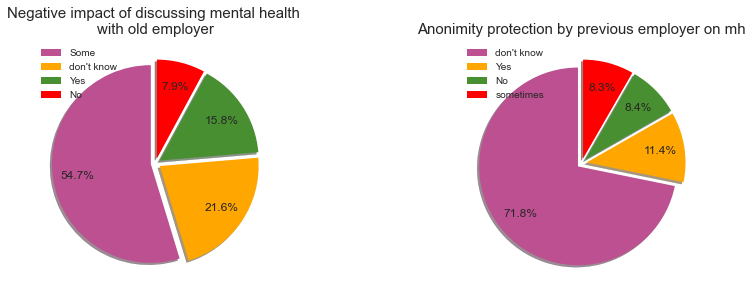

In [42]:
# First Pie: 
labels = ["with some of them", 'No', "Yes"]
value = df['wiling_to_discuss_mh_with_old_coworker'].value_counts()
sizes = [value[0],value[1],value[2]]
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)
explode1 = (0.05, 0.05, 0.05)

plt.figure(figsize=(14, 10))
plt.suptitle("Mental health discussion in previous workplace",fontsize=15)
plt.subplot(2, 2, 1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels, loc="best")
plt.title("Wiling to discuss menatl health with old coworker",fontsize=15)

# Second Pie:
labels_2 = ["No one","sone","don't know","Yes"]
value = df["discussion_about_mh_by_previous_empoyer"].value_counts()
explode = (0.05, 0.05, 0.05,0.05)
sizes_2 = [value[0],value[1],value[2],value[3]]

plt.subplot(2, 2, 2)
plt.pie(sizes_2, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels_2, loc="best")
plt.title("wiling to discuss mental health with previous employer",fontsize=15)

# third Pie: 
labels = ["Some", "don't know", "Yes","No"]
value = df['neg_impact_of_mh_discussion_with_old_employer'].value_counts()
sizes_3 = [value[0],value[1],value[2],value[3]]
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
plt.pie(sizes_3, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels, loc="best")
plt.title("Negative impact of discussing mental health \nwith old employer",fontsize=15)

# fourth Pie:  
labels_2 = ["don't know","Yes","No","sometimes"]
value = df["anonimity_protection_by_previous_empolyer_on_mh"].value_counts()
explode = (0.05, 0.05, 0.05,0.05)
sizes_4 = [value[0],value[1],value[2],value[3]]

plt.subplot(2, 2, 4)
plt.pie(sizes_4, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True ,explode=explode)
plt.legend(labels_2, loc="best")
plt.title("Anonimity protection by previous employer on mh",fontsize=15)

Text(0.5, 1.0, 'Mental health discussion negative consequences')

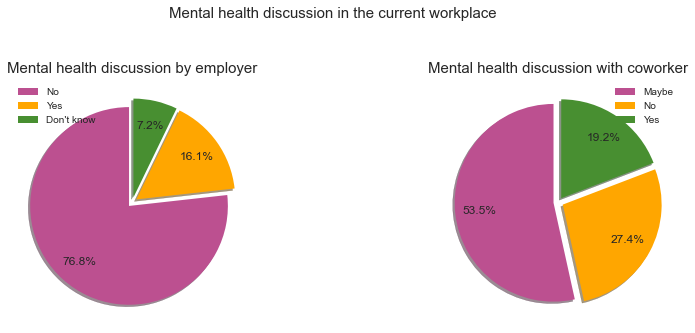

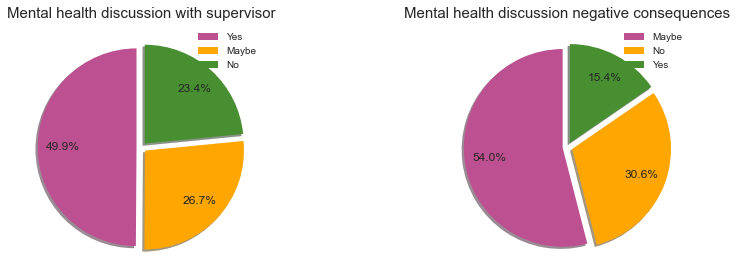

In [43]:
# First Pie: 
labels = ["No", 'Yes', "Don't know"]
value = df['mh_discussion_by_employer'].value_counts()
sizes = [value[0],value[1],value[2]]
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)
explode1 = (0.05, 0.05, 0.05)

plt.figure(figsize=(14, 10))
plt.suptitle("Mental health discussion in the current workplace",fontsize=15)
plt.subplot(2, 2, 1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels, loc="best")
plt.title("Mental health discussion by employer",fontsize=15)

# Second Pie: MH 
labels_2 = ["Maybe","No","Yes"]
value = df["mh_discussion_with_coworker"].value_counts()
explode = (0.05, 0.05, 0.05,0.05)
sizes_2 = [value[0],value[1],value[2]]

plt.subplot(2, 2, 2)
plt.pie(sizes_2, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels_2, loc="best")
plt.title("Mental health discussion with coworker",fontsize=15)

# third Pie: 
labels = [ "Yes","Maybe","No"]
value = df['mh_discussion_with_supervisor'].value_counts()
sizes_3 = [value[0],value[1],value[2]]
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
plt.pie(sizes_3, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels, loc="best")
plt.title("Mental health discussion with supervisor",fontsize=15)

# fourth Pie:  
labels_2 = ["Maybe","No","Yes"]
value = df["mh_discussion_neg_consiquences"].value_counts()
explode = (0.05, 0.05, 0.05,0.05)
sizes_4 = [value[0],value[1],value[2]]

plt.subplot(2, 2, 4)
plt.pie(sizes_4, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels_2, loc="best")
plt.title("Mental health discussion negative consequences",fontsize=15)

Text(0.5, 1.0, 'Seriousness of mental health by employer')

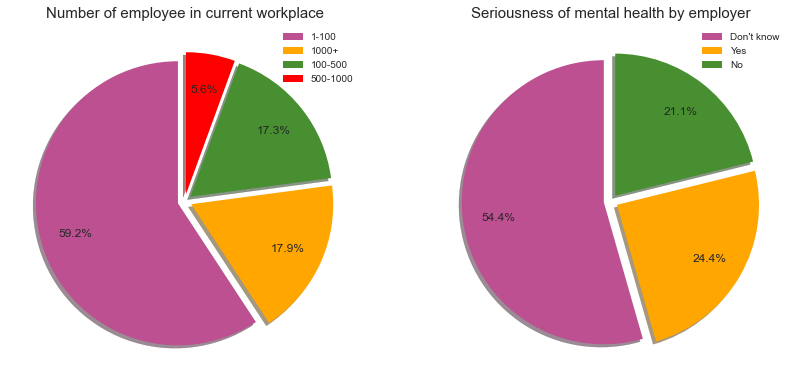

In [44]:
plt.figure(figsize=(14, 10))
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05,0.05)
explode1 = (0.05,0.05,0.05)
# First Pie: 
labels = ["1-100", '1000+', "100-500","500-1000"]
value = df['no_of_employee'].value_counts()
sizes = [value[0],value[1],value[2],value[3]]

plt.subplot(1, 2, 1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels, loc="best")
plt.title("Number of employee in current workplace",fontsize=15)


labels = ["Don't know", 'Yes', "No"]
value = df['seriousness_of_mh_by_employer'].value_counts()
sizes1 = [value[0],value[1],value[2]]

plt.subplot(1, 2, 2)
plt.pie(sizes1, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels, loc="best")
plt.title("Seriousness of mental health by employer",fontsize=15)

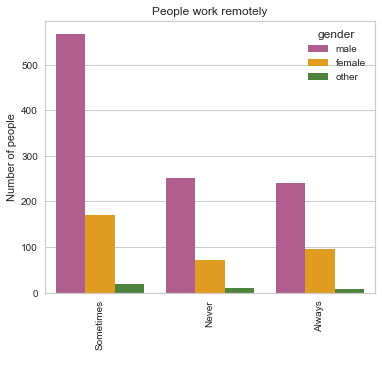

In [45]:
plt.figure(figsize=(13, 5))

palette=["#bc5090","#ffa600","#488f31","red"]
plt.subplot(1,2,1)
sns.countplot(x="work_remotely", hue="gender", data=df,palette=palette)
plt.xticks(rotation=90)
plt.title('People work remotely')
plt.ylabel('Number of people')
plt.xlabel(" ")
plt.show()


Text(0.5, 1.0, 'Mental health leave')

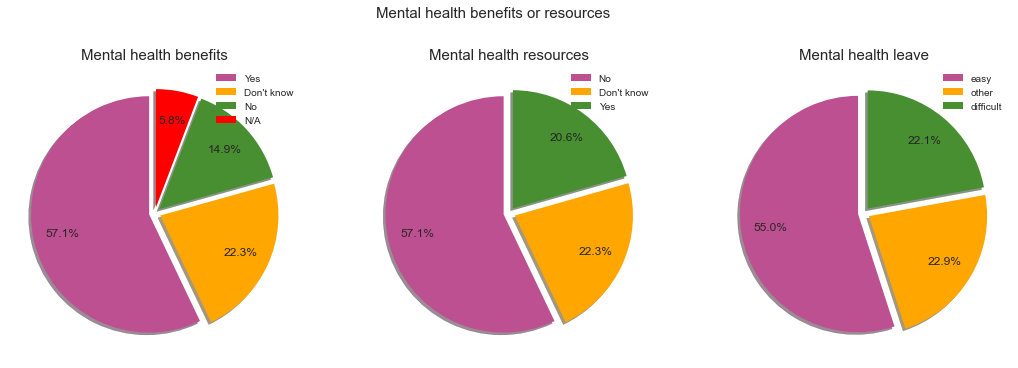

In [46]:
# First Pie: 
plt.figure(figsize=(18, 6))
labels = ["Yes", "Don't know","No","N/A"]
value = df['mh_benefit'].value_counts()
sizes = [value[0],value[1],value[2],value[3]]
colors = ["#bc5090","#ffa600","#488f31","red"]
explode = (0.05, 0.05, 0.05, 0.05)
explode1 = (0.05, 0.05, 0.05)


plt.suptitle("Mental health benefits or resources",fontsize=15)
plt.subplot(1, 3, 1)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode)
plt.legend(labels, loc="best")
plt.title("Mental health benefits",fontsize=15)

# Second Pie: MH 
labels_2 = ["No","Don't know","Yes"]
value = df["ml_resources"].value_counts()
sizes_2 = [value[0],value[1],value[2]]

plt.subplot(1, 3, 2)
plt.pie(sizes_2, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels_2, loc="best")
plt.title("Mental health resources",fontsize=15)

# third Pie: 
labels = [ "easy","other","difficult"]
value = df['mh_leave'].value_counts()
sizes_3 = [value[0],value[1],value[2]]
colors = ["#bc5090","#ffa600","#488f31","red"]

#plt.figure(figsize=(18, 3))
plt.subplot(1, 3, 3)
plt.pie(sizes_3, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75,shadow=True, explode=explode1)
plt.legend(labels, loc="best")
plt.title("Mental health leave",fontsize=15)

In [47]:
# label encoding

label = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label.fit_transform(df[column].astype(str))
        
df.head()

self_employed  no_of_employee  tech_employeer  mh_benefit  \
0              0               0               1           2   
1              0               0               1           1   
2              0               0               1           1   
3              1               0               1           3   
4              0               0               0           3   

   mhcare_by_employer  mh_discussion_by_employer  ml_resources  \
0                   1                          1             1   
1                   2                          2             2   
2                   1                          1             1   
3                   1                          1             1   
4                   2                          1             1   

   anonimity_protection_by_employer  mh_leave  mh_discussion_neg_consiquences  \
0                                 0         1                               1   
1                                 2         1                               1   
2                                 0         2                               0   
3                                 0         1                               0   
4                                 1         2                               2   

   ...  currently_mh_disorder  diagnosed_with_mh_issue_by_professional  \
0  ...                      1                                        1   
1  ...                      2                                        1   
2  ...                      1                                        0   
3  ...                      2                                        1   
4  ...                      2                                        1   

   sought_treatment_for_mh_by_professional  mh_issue_with_work  \
0                                        0                   3   
1                                        1                   2   
2                                        1                   3   
3                                        1                   3   
4                                        1                   3   

   mh_issue_with_work_if_not_treated  age  gender  country_live  position  \
0                                  1    1       1            12         4   
1                                  3    0       1            13         4   
2                                  1    1       1            12         4   
3                                  3    1       1            12         5   
4                                  3    1       0            13         5   

   work_remotely  
0              2  
1              1  
2              0  
3              2  
4              2  

[5 rows x 45 columns]

<AxesSubplot:>

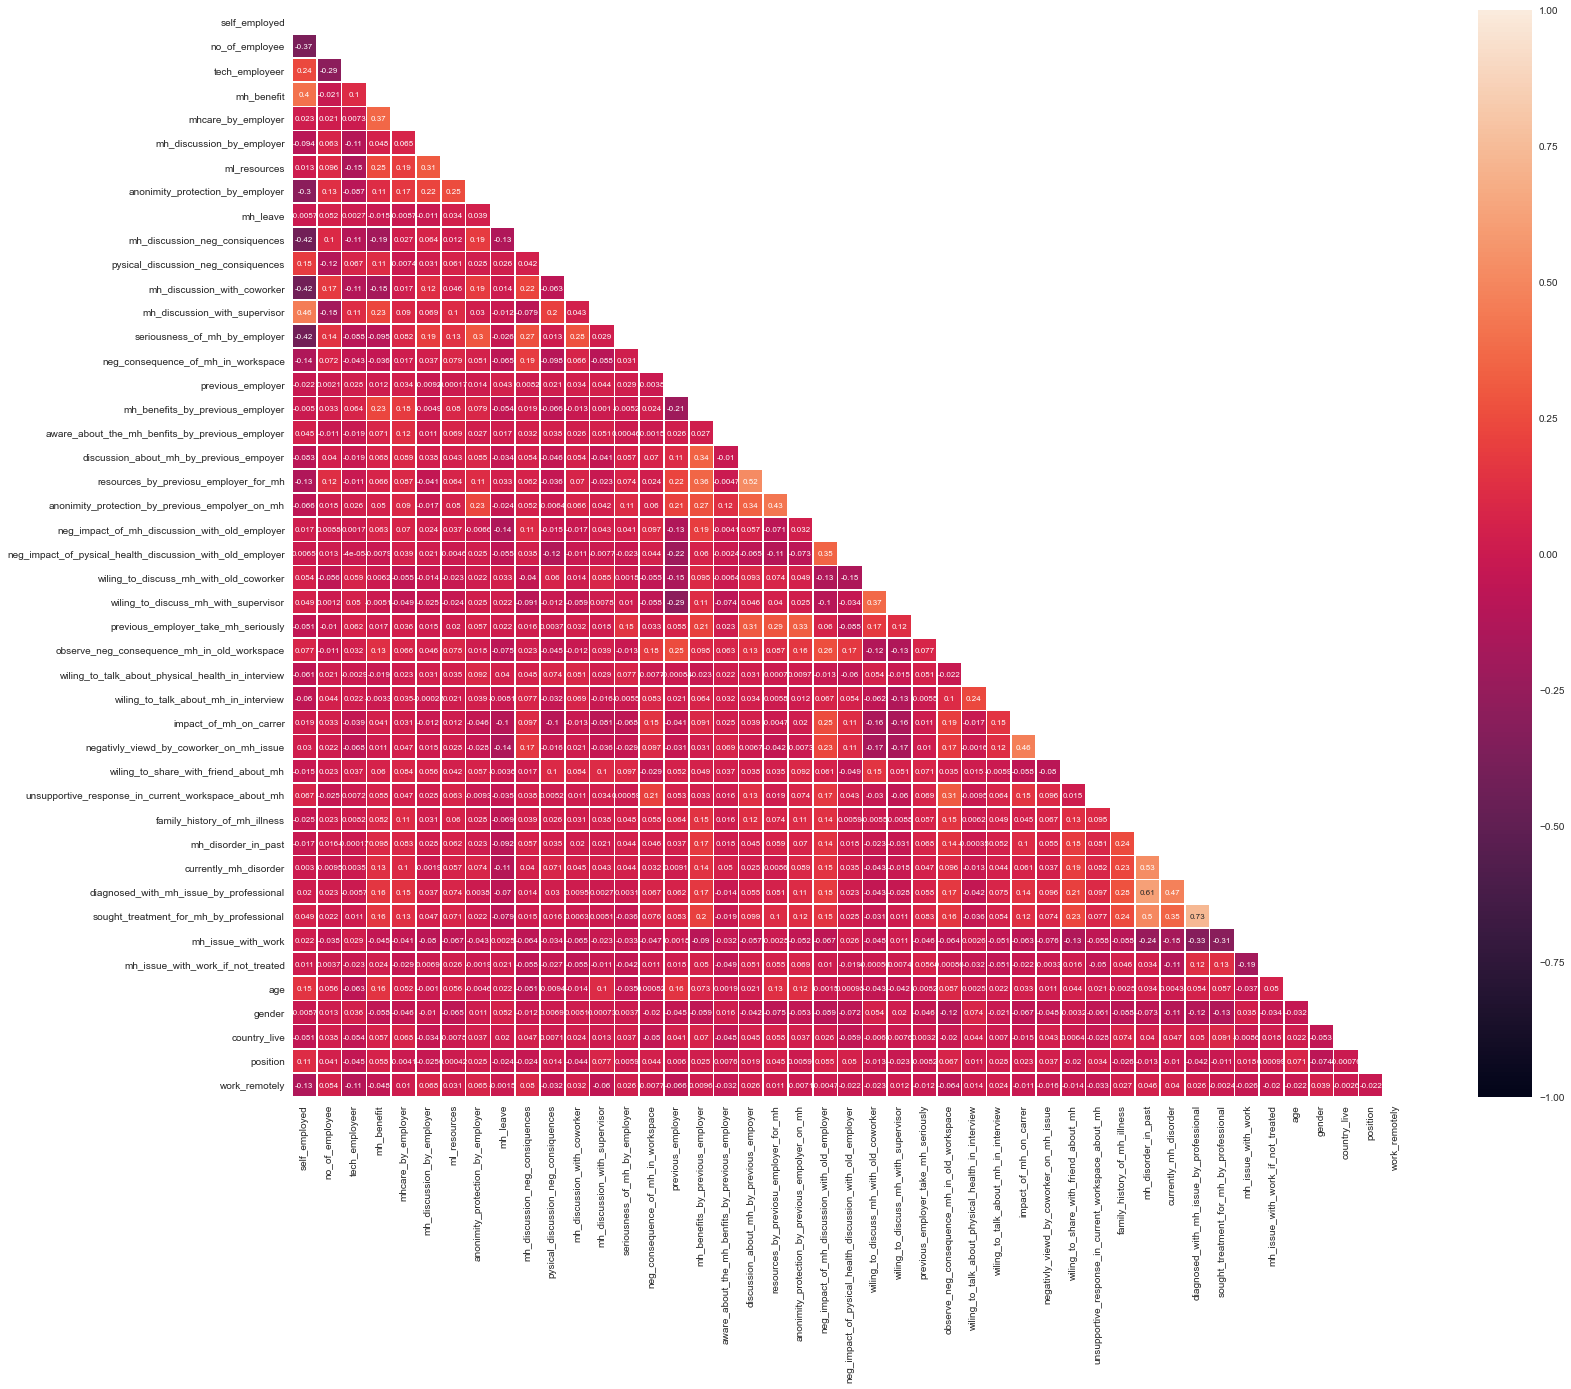

In [48]:
plt.figure(figsize=(25, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={'size': 8}, linewidths=0.7)

In [49]:
X = df
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [50]:
X_std_scaled = pd.DataFrame(X_std, columns=X.columns)
corr_matrix = X_std_scaled.corr()

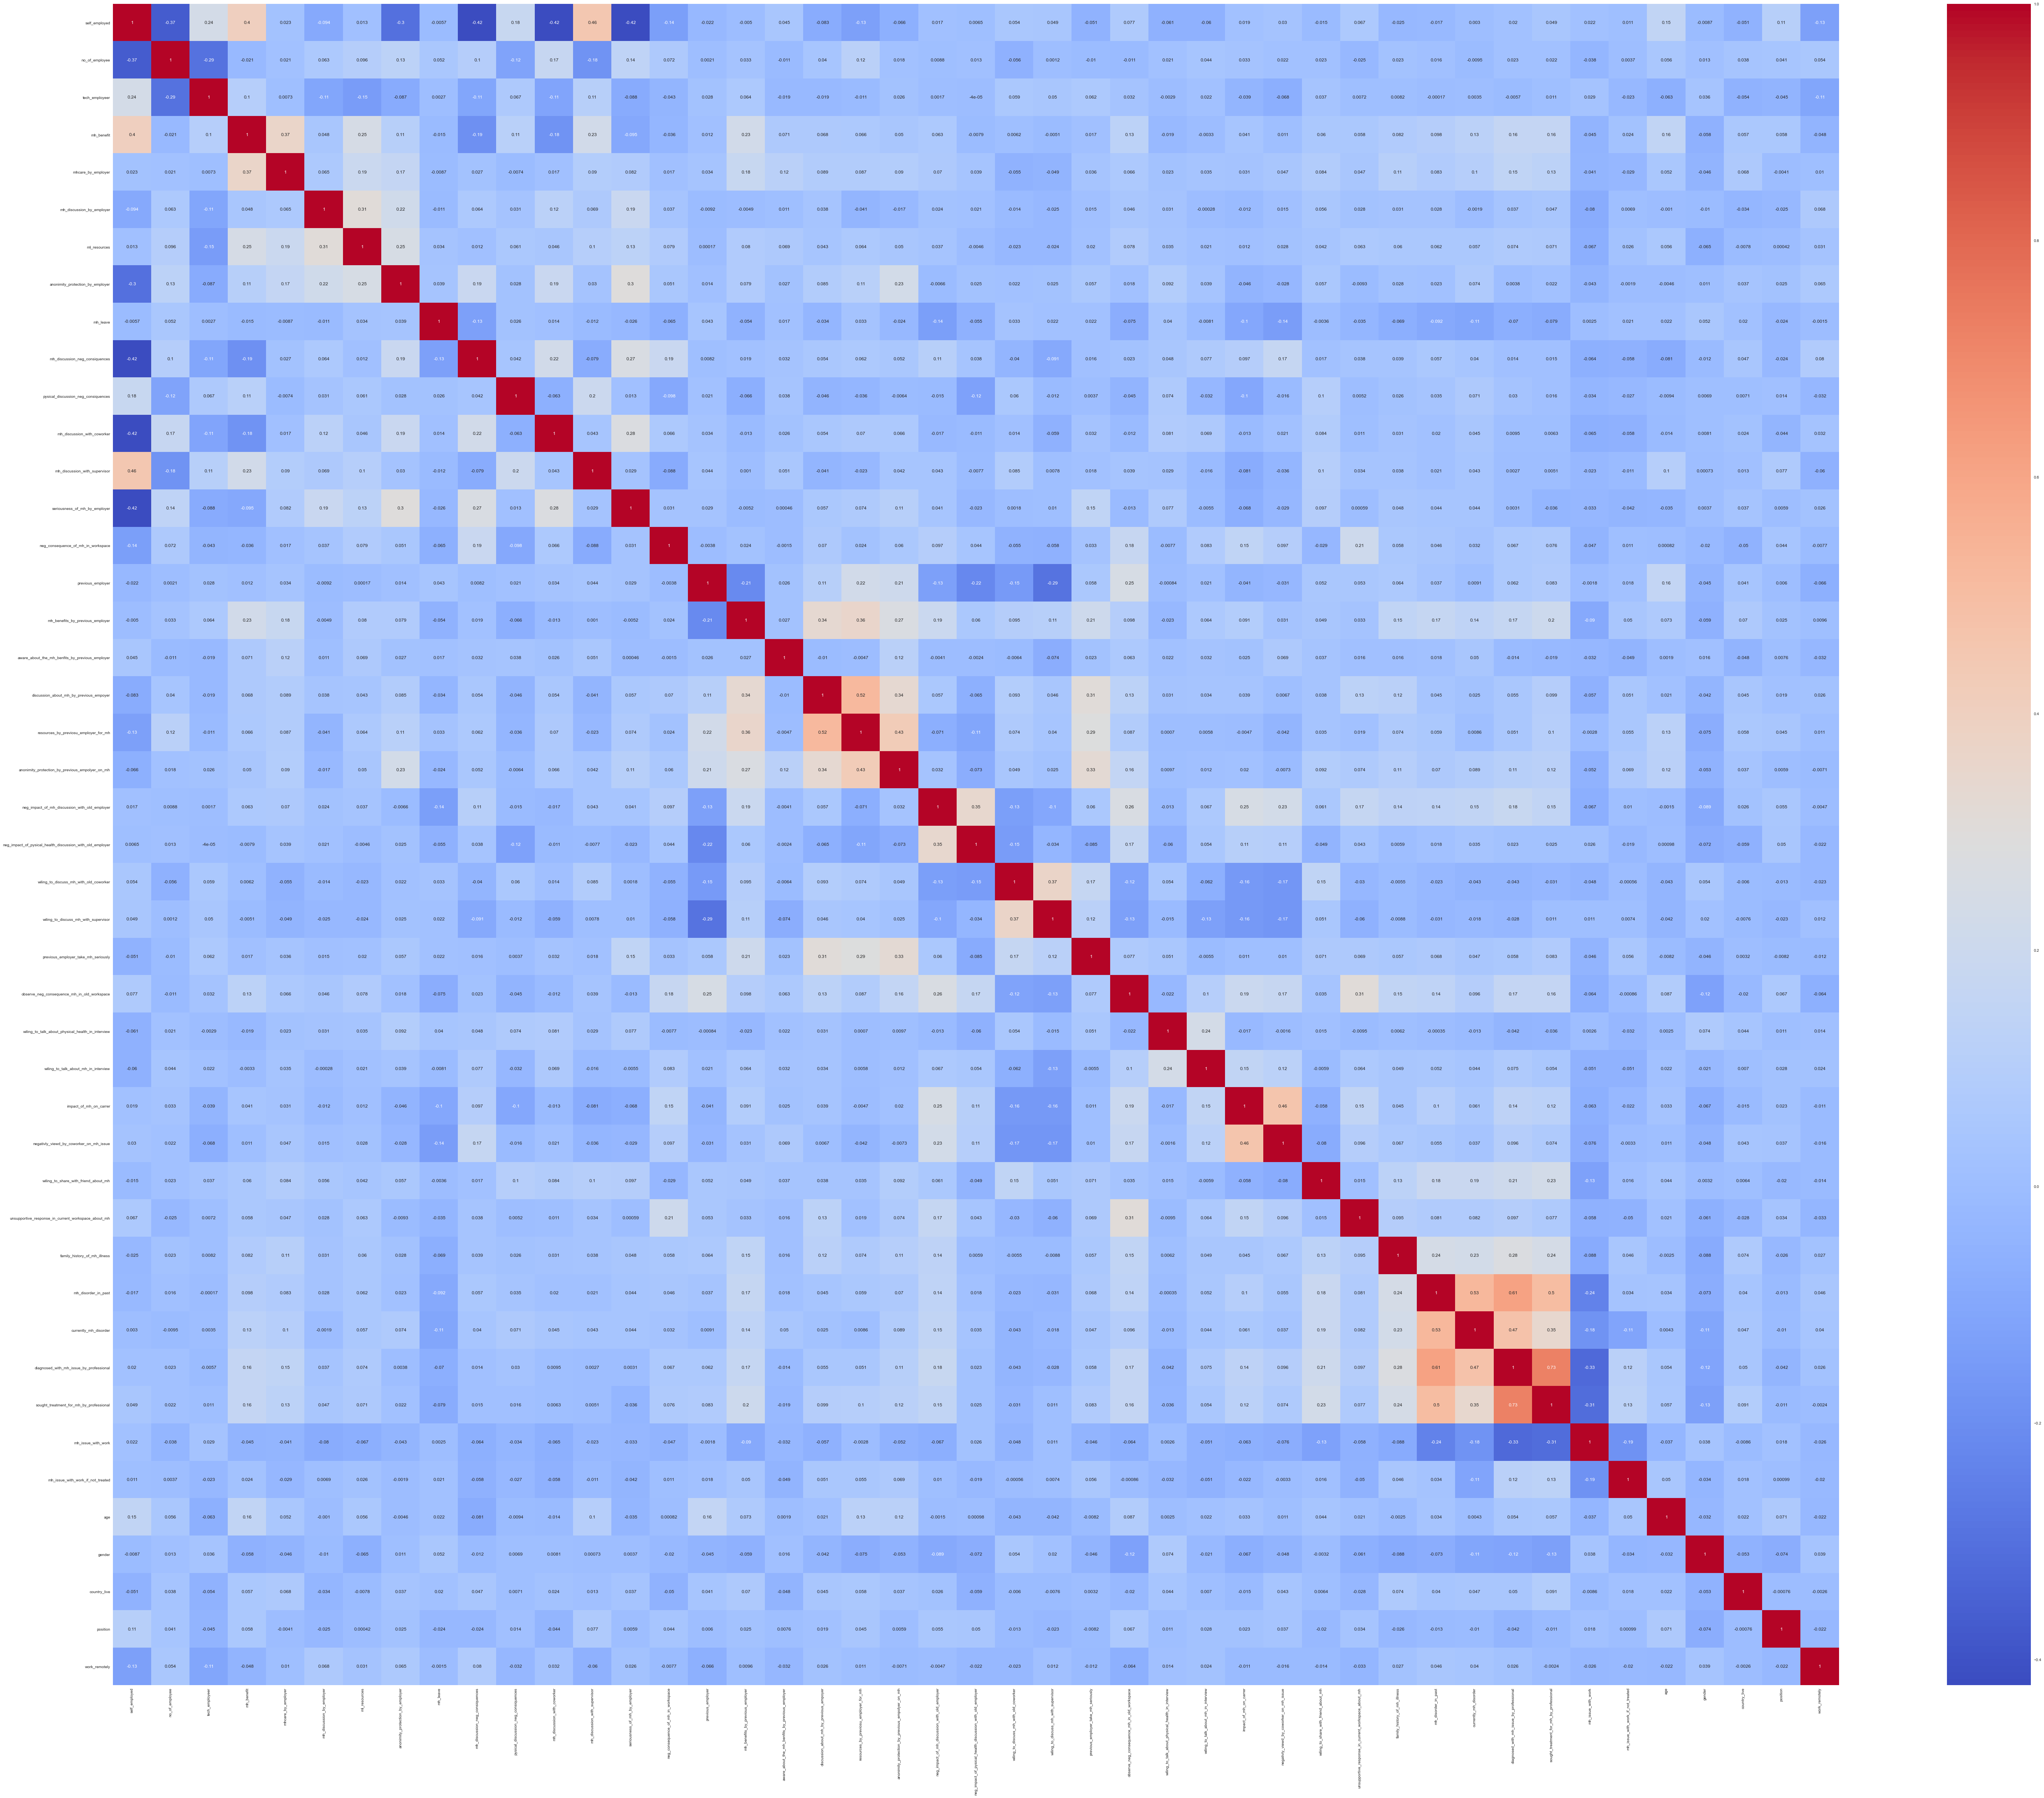

In [51]:
# visalization of the correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Dimensionality reduction

In [52]:
pca = PCA(n_components=0.8)
pca.fit
X_pca = pca.fit_transform(X_std)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.08713512 0.06436497 0.05598405 0.04669495 0.04199814 0.03800882
 0.03357165 0.02894877 0.0278536  0.02598782 0.02578293 0.02475258
 0.02406709 0.02292786 0.02186331 0.02180494 0.02105255 0.02045926
 0.01997965 0.01913985 0.01905024 0.01880476 0.01810354 0.01764489
 0.01710164 0.01639043 0.01588815 0.0156257 ]


In [53]:
print(X_pca.shape)
print(X.shape)

(1433, 28)
(1433, 45)


In [54]:
X_pca

array([[-1.56711704,  1.30300335, -0.05276979, ..., -0.34395522,
         0.25514083,  0.0975814 ],
       [ 3.01077703, -1.11605363,  2.40556493, ...,  0.24488102,
        -1.20096373,  0.06865645],
       [-2.05531649,  0.15335434,  0.82255208, ..., -0.55602986,
         1.20672831, -0.39702489],
       ...,
       [ 3.70102717, -0.1574679 , -0.44006488, ...,  0.37542176,
        -0.06240632,  0.34947898],
       [-0.34374854, -0.38672847, -1.58938736, ...,  0.64295582,
        -2.59220573,  0.69841095],
       [-1.61076167,  0.30248132, -0.78142057, ..., -0.05364903,
        -1.20450515,  0.54110632]])

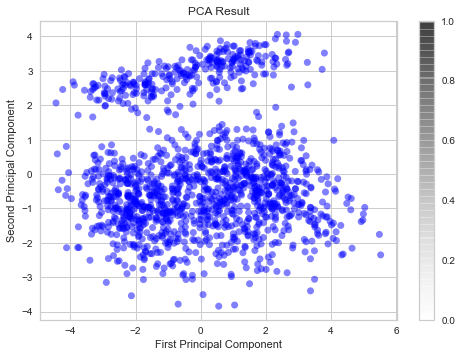

In [55]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue",edgecolor='none', alpha = 0.5, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.colorbar()
plt.show()


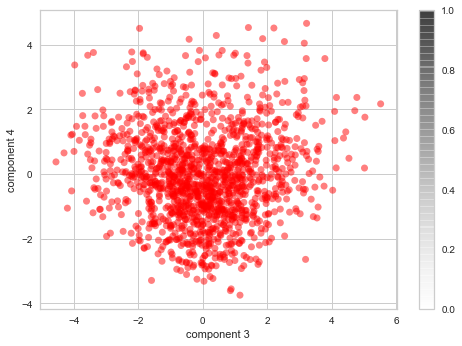

In [56]:
plt.scatter(X_pca[:, 2], X_pca[:, 3],
            c="red", edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

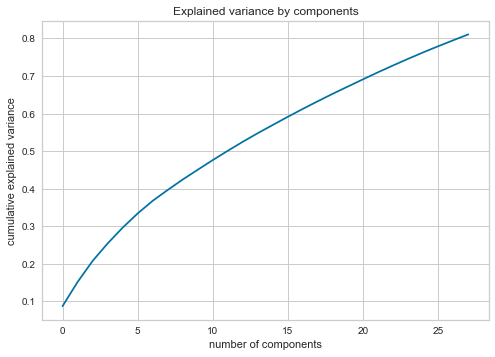

In [57]:
# visualize cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.title('Explained variance by components')
plt.ylabel('cumulative explained variance')

# from the graph it can be seen that more than 80% of the variance is seen from the 

# Clustering

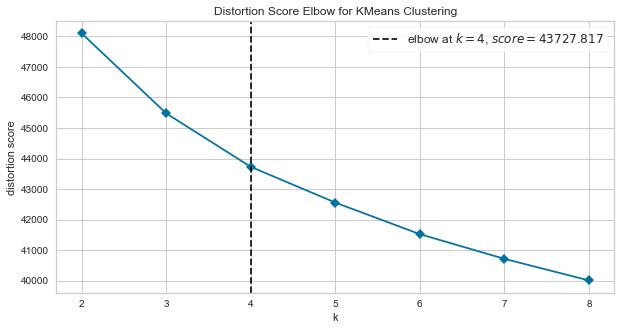

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
model = KMeans(init="k-means++", max_iter=200)
# create a k-Means model an Elbow-Visualizer
visualizer = KElbowVisualizer(model, timings=False, k=8) 
# fit the visualizer and show the plot
plt.figure(figsize=(10, 5))
visualizer.fit(X_pca)
visualizer.show()

In [59]:
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i,init = "k-means++", random_state=42)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

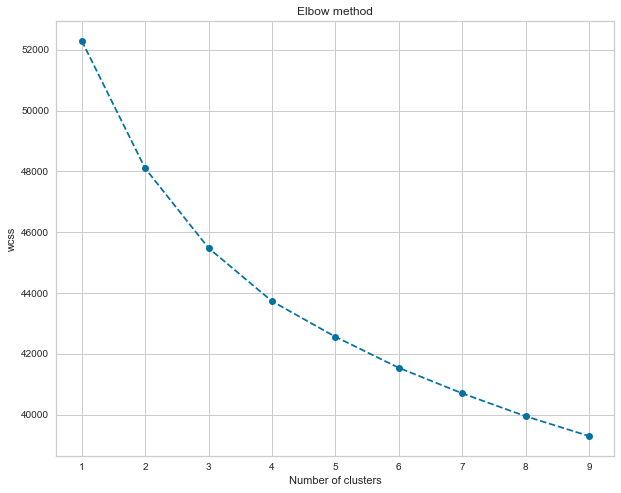

In [60]:
plt.figure(figsize= (10,8))
plt.plot(range(1,10),wcss, marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.title('Elbow method')
plt.ylabel('wcss')
plt.show()

In [61]:
kmeans_pca = KMeans(n_clusters=4, init= 'k-means++',n_init ="auto" ,random_state=42)
cluster = kmeans_pca.fit_predict(X_pca)

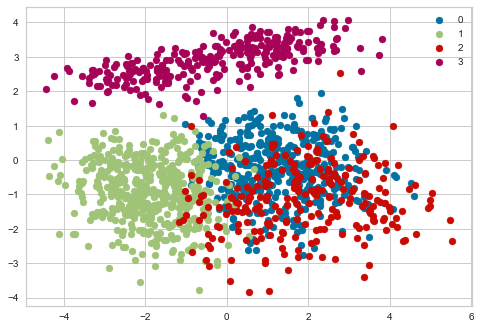

In [62]:
u_labels = np.unique(cluster)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[cluster == i , 0] , X_pca[cluster == i , 1] , label = i)
plt.legend()
plt.show()

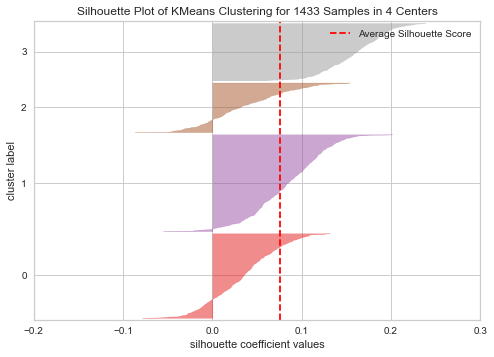

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1433 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
sil_visualizer = SilhouetteVisualizer(kmeans_pca)
sil_visualizer.fit(X_pca)    
sil_visualizer.show()

In [64]:
inertia_score = kmeans_pca.inertia_
print("Inertia:", inertia_score)

# Silhouette Score
silhouette_avg = silhouette_score(X_pca, cluster)
print("Silhouette Avg:", round(silhouette_avg, 3))

# Calinski Harabasz Score
cal_score = calinski_harabasz_score(X_pca, cluster)
print("Calinski Harabasz Score:", round(cal_score, 1))

# Davies Bouldin Score
d_score = davies_bouldin_score(X_pca, cluster)
print("Davies Bouldin Score:", round(d_score, 2))

Inertia: 43728.68555675553
Silhouette Avg: 0.076
Calinski Harabasz Score: 93.3
Davies Bouldin Score: 3.08


In [65]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(X_pca)], axis=1)
df_pca_kmeans.columns.values[-3: ] = ['component 1','component 2','component 3']
df_pca_kmeans['kmeans pca'] = kmeans_pca.labels_

In [66]:
df_pca_kmeans.head()

self_employed  no_of_employee  tech_employeer  mh_benefit  \
0              0               0               1           2   
1              0               0               1           1   
2              0               0               1           1   
3              1               0               1           3   
4              0               0               0           3   

   mhcare_by_employer  mh_discussion_by_employer  ml_resources  \
0                   1                          1             1   
1                   2                          2             2   
2                   1                          1             1   
3                   1                          1             1   
4                   2                          1             1   

   anonimity_protection_by_employer  mh_leave  mh_discussion_neg_consiquences  \
0                                 0         1                               1   
1                                 2         1                               1   
2                                 0         2                               0   
3                                 0         1                               0   
4                                 1         2                               2   

   ...        19        20        21        22        23        24  \
0  ...  0.187594  0.561144 -0.750253 -0.238814  0.374333 -0.331467   
1  ... -0.896181  0.004118  0.170448 -1.103652  0.410652 -0.336080   
2  ...  1.348166  0.529548 -0.022594  0.427450  2.127272 -0.149743   
3  ... -1.230081  1.487392  0.755653 -0.161252 -0.476879  0.607272   
4  ... -0.776717  0.052083 -1.895847 -0.027781 -1.111299 -0.488625   

   component 1  component 2  component 3  kmeans pca  
0    -0.343955     0.255141     0.097581           1  
1     0.244881    -1.200964     0.068656           2  
2    -0.556030     1.206728    -0.397025           1  
3     0.264843     1.528207    -0.667823           3  
4     0.341734     1.054073    -0.900889           0  

[5 rows x 74 columns]

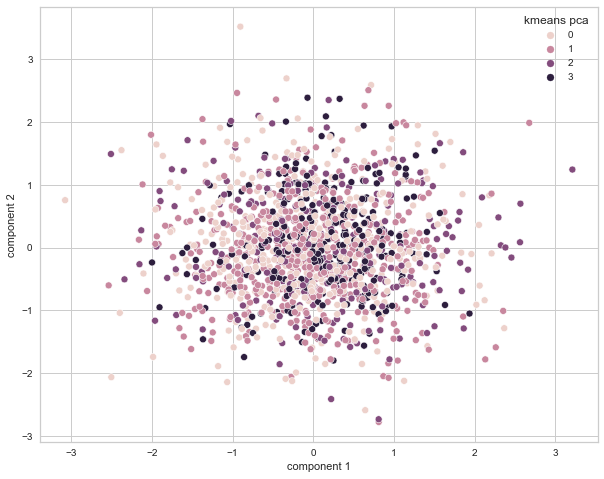

In [67]:
# visualization of component 1 and component 2
x_axis = df_pca_kmeans['component 1']
y_axis = df_pca_kmeans['component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_pca_kmeans['kmeans pca'])
plt.show()

<AxesSubplot:xlabel='component 1', ylabel='component 3'>

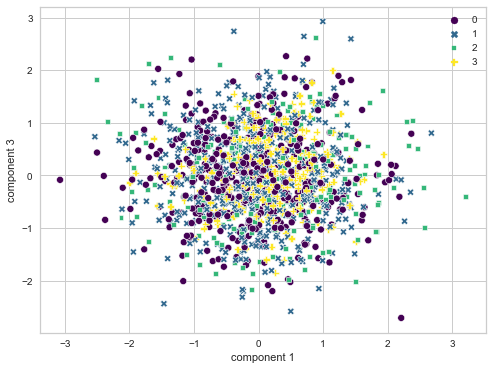

In [68]:
# visualization of component 1 and component 3

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_kmeans, x='component 1', y='component 3',
                hue=cluster, palette='viridis', style=cluster, legend='full')

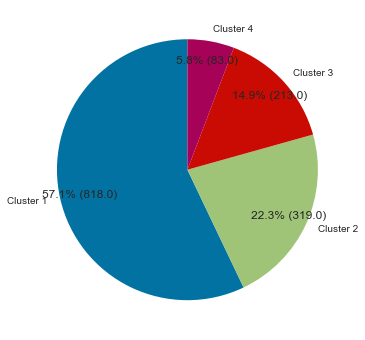

In [69]:
# visualization of cluster label through pie chart

cluster_labels = [f'Cluster {i + 1}' for i in range(4)]

def func(val):
    a = np.round(val/100.*sum(sizes))
    return f'{round(val, 1)}% ({a})'

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=cluster_labels, autopct=func, startangle=90, pctdistance=0.85)
plt.show()

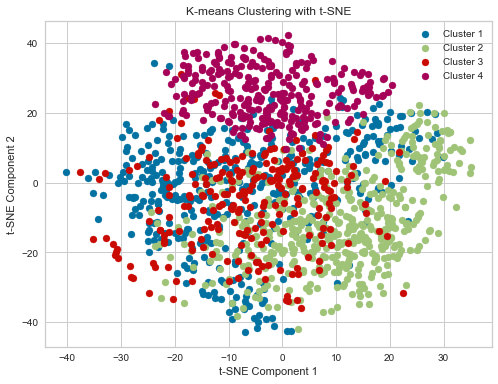

In [70]:
# visualization through TSNE.

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(projections[cluster == i][:, 0], projections[cluster == i][:, 1], label=f'Cluster {i + 1}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering with t-SNE')
plt.legend()
plt.show()

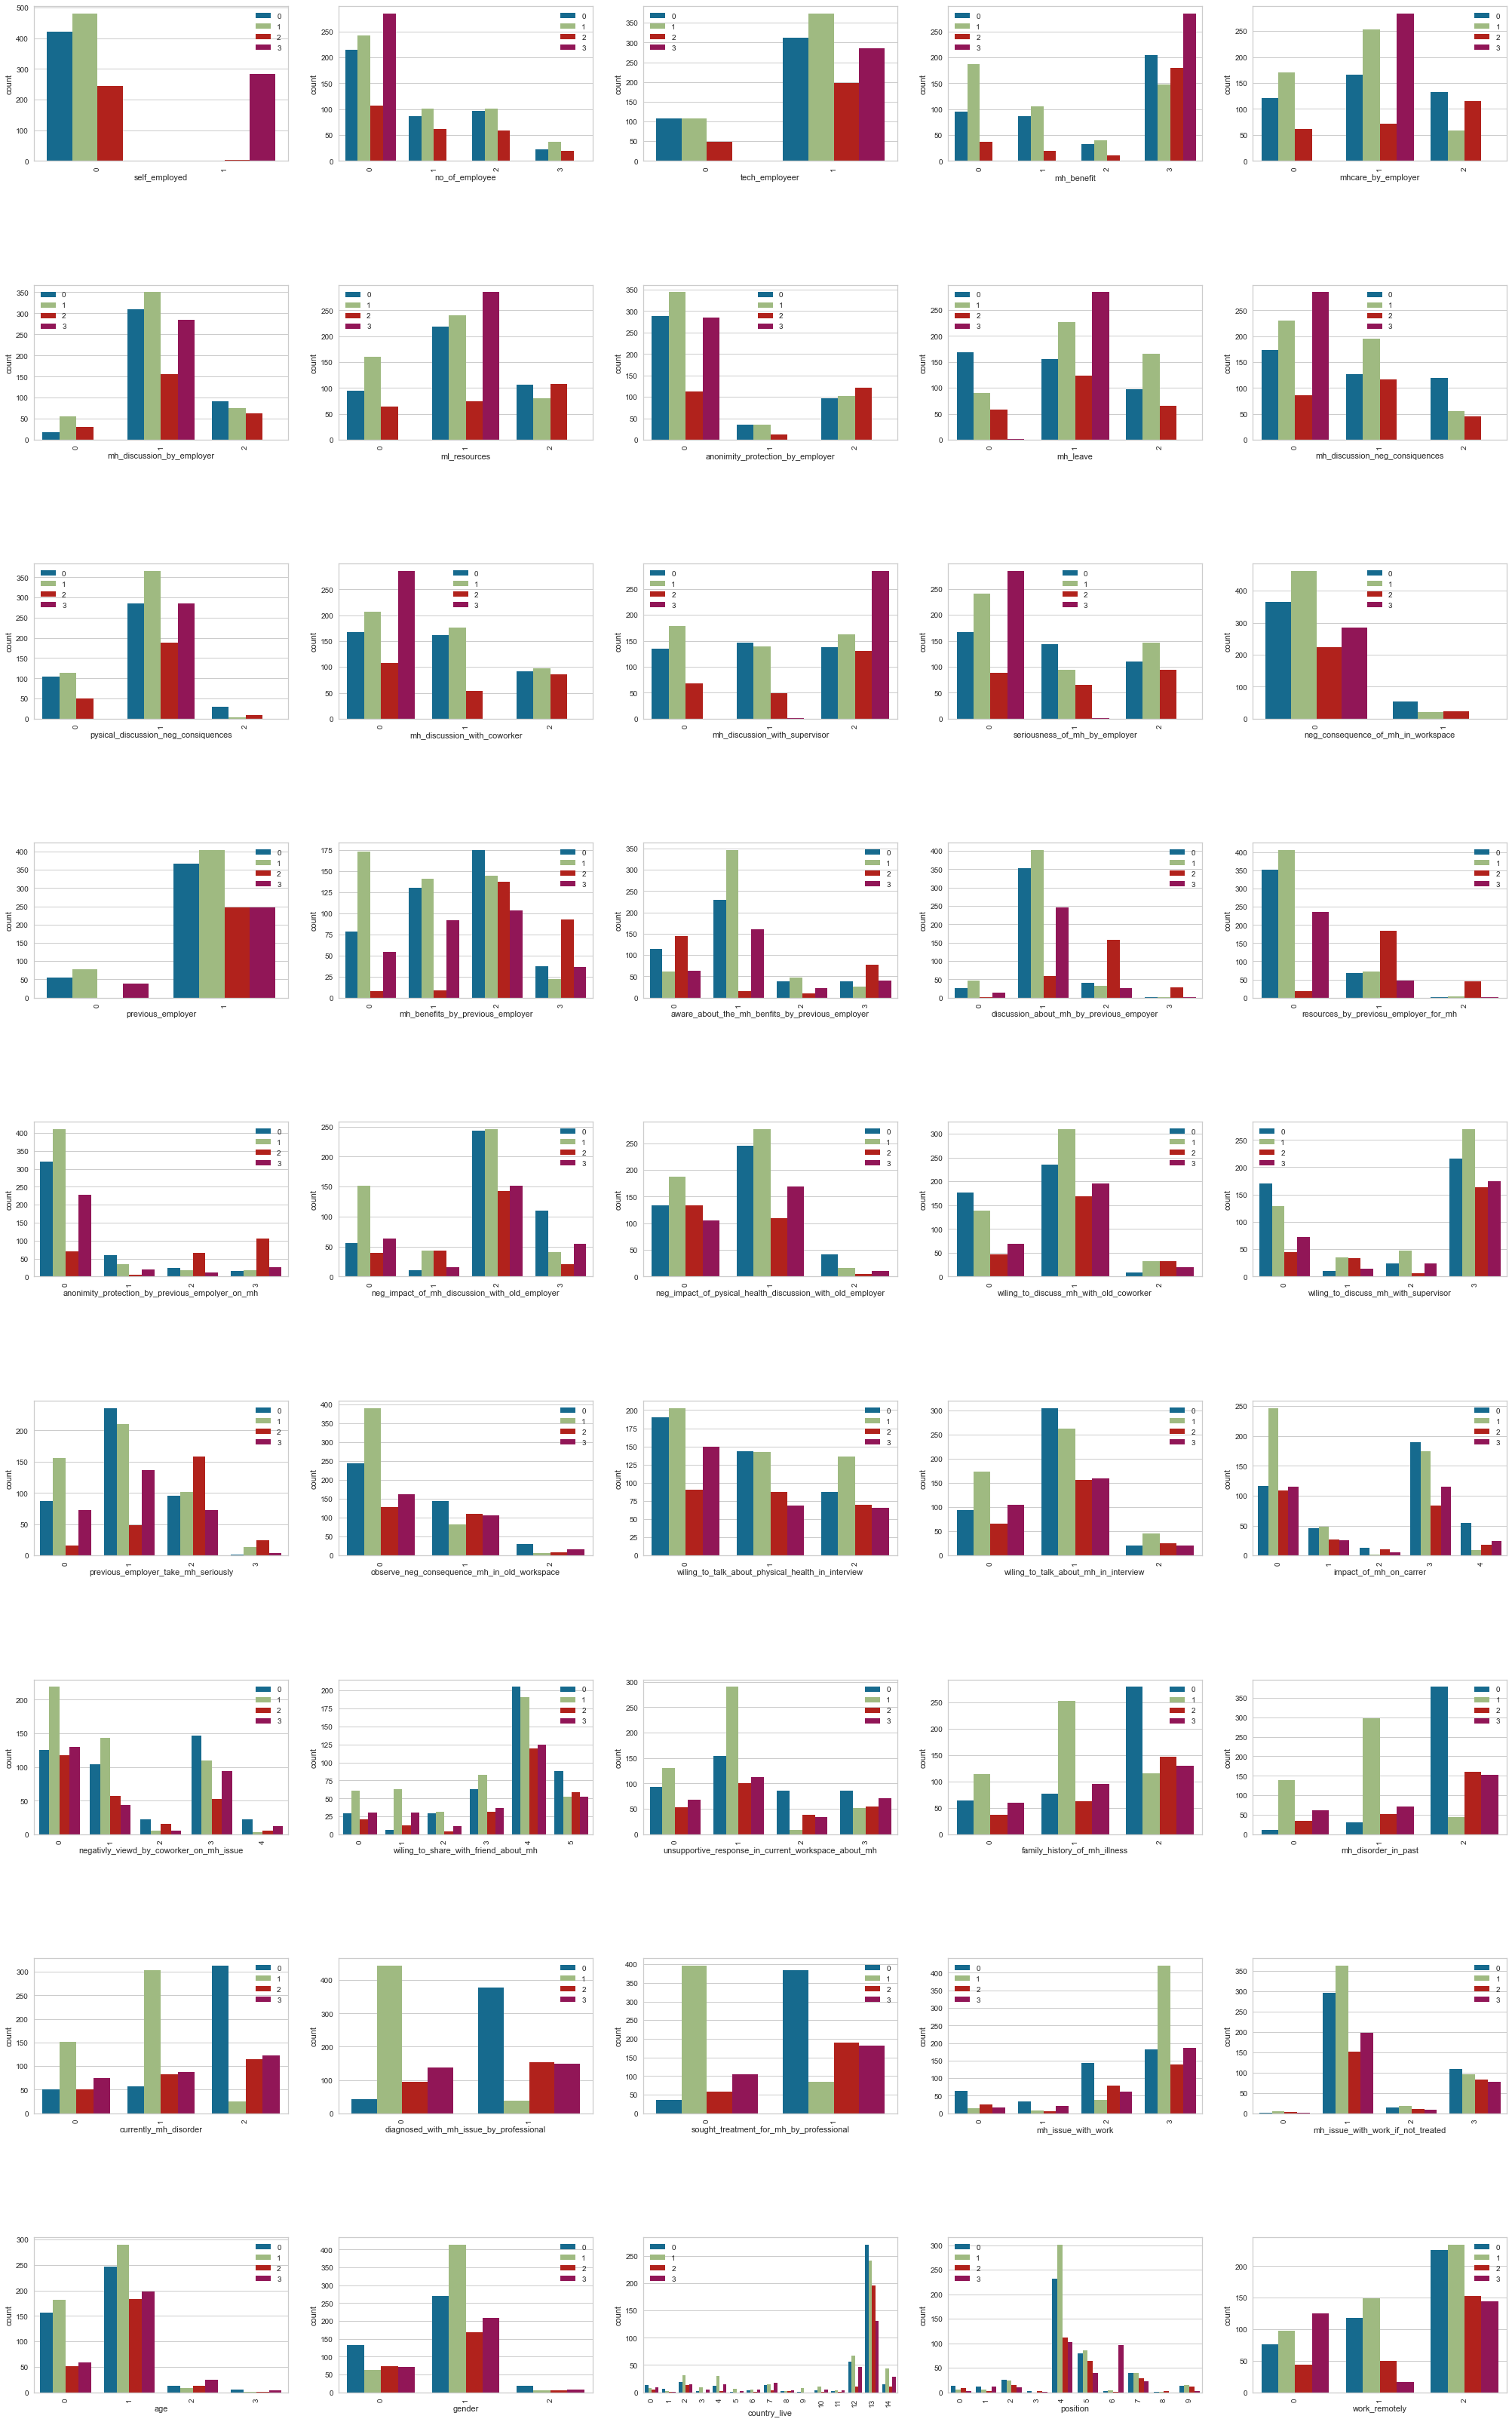

In [71]:
# visulization through multi-plot countplot 

c =  X.columns

plt.figure(figsize=(35, 65))
for i, column in enumerate(df.columns):
    if column != cluster:
        plt.subplot(10, 5, i+1)
        sns.countplot(data=df, x=column, hue=cluster)
        plt.xticks(rotation=90)
        plt.subplots_adjust(wspace=0.2, hspace=0.8)

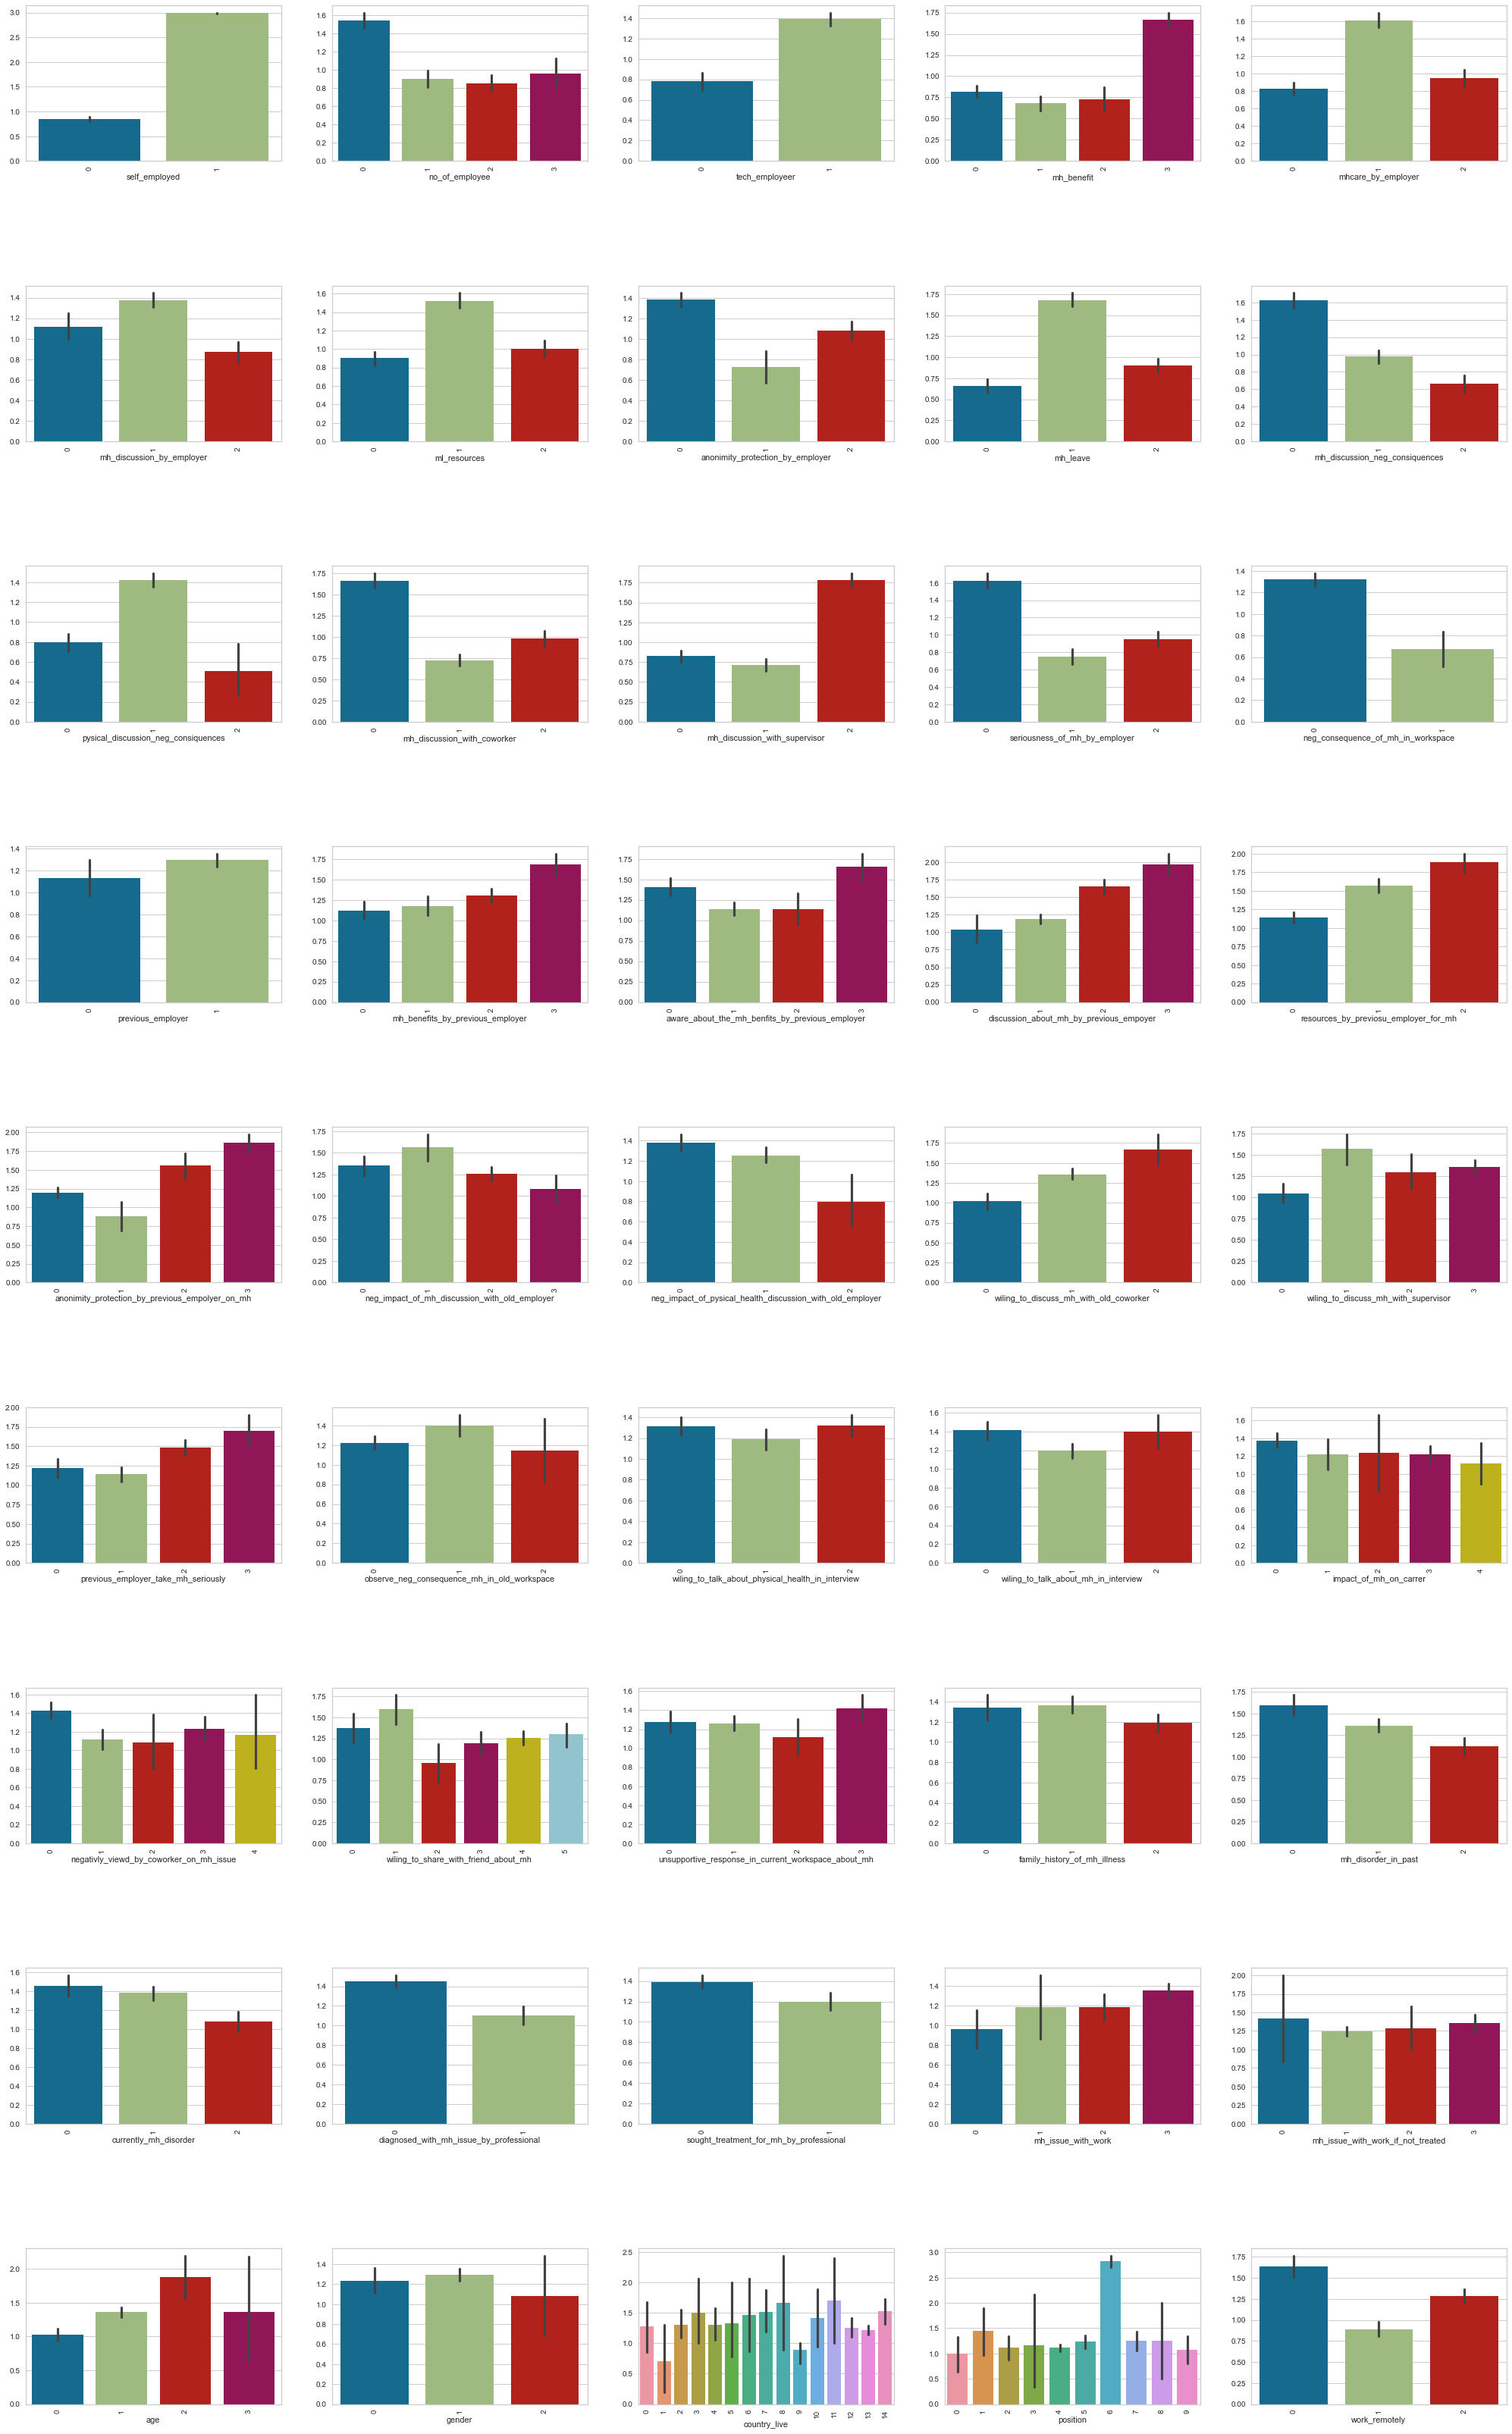

In [72]:
# visualization through barplot 

c =  X.columns

plt.figure(figsize=(35, 65))
for i, column in enumerate(c):
    if column != cluster:
        plt.subplot(10, 5, i+1)
        sns.barplot(data=X, x=column, y=cluster)
        plt.xticks(rotation=90)
        plt.subplots_adjust(wspace=0.2, hspace=0.8)

